In [ ]:
#importing library and loading data

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

#datasets
destinations_df = pd.read_csv("/content/Expanded_Destinations.csv")
reviews_df = pd.read_csv("/content/Final_Updated_Expanded_Reviews.csv")
userhistory_df = pd.read_csv("/content/Final_Updated_Expanded_UserHistory.csv")
users_df = pd.read_csv("/content/Final_Updated_Expanded_Users.csv")


In [ ]:
destinations_df.head()

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
0,1,Taj Mahal,Uttar Pradesh,Historical,8.691906,Nov-Feb
1,2,Goa Beaches,Goa,Beach,8.605032,Nov-Mar
2,3,Jaipur City,Rajasthan,City,9.225372,Oct-Mar
3,4,Kerala Backwaters,Kerala,Nature,7.977386,Sep-Mar
4,5,Leh Ladakh,Jammu and Kashmir,Adventure,8.399822,Apr-Jun


In [ ]:
reviews_df.head()

,ReviewID,DestinationID,UserID,Rating,ReviewText
0,1,178,327,2,Incredible monument!
1,2,411,783,1,Loved the beaches!
2,3,927,12,2,A historical wonder
3,4,358,959,3,Incredible monument!
4,5,989,353,2,Loved the beaches!


In [ ]:
userhistory_df.head()

,HistoryID,UserID,DestinationID,VisitDate,ExperienceRating
0,1,525,760,2024-01-01,3
1,2,184,532,2024-02-15,5
2,3,897,786,2024-03-20,2
3,4,470,660,2024-01-01,1
4,5,989,389,2024-02-15,4


In [ ]:
users_df.head()

,UserID,Name,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,Kavya,kavya@example.com,"Beaches, Historical",Female,1,0
1,2,Rohan,rohan@example.com,"Nature, Adventure",Male,2,2
2,3,Kavya,kavya@example.com,"City, Historical",Female,2,0
3,4,Anika,anika@example.com,"Beaches, Historical",Female,1,0
4,5,Tanvi,tanvi@example.com,"Nature, Adventure",Female,2,2


In [ ]:
reviews_destinations = pd.merge(reviews_df, destinations_df, on='DestinationID', how='inner')
reviews_destinations_userhistory = pd.merge(reviews_destinations, userhistory_df, on='UserID', how='inner')
df=pd.merge(reviews_destinations_userhistory,users_df,on='UserID',how='inner')



In [ ]:
df.head()

,ReviewID,DestinationID_x,UserID,Rating,ReviewText,Name_x,State,Type,Popularity,BestTimeToVisit,HistoryID,DestinationID_y,VisitDate,ExperienceRating,Name_y,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,178,327,2,Incredible monument!,Jaipur City,Rajasthan,City,8.544352,Oct-Mar,79,175,2024-01-01,3,Pooja,pooja@example.com,"City, Historical",Female,1,1
1,2,411,783,1,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,8.284127,Nov-Feb,834,894,2024-03-20,2,Karan,karan@example.com,"City, Historical",Male,1,1
2,4,358,959,3,Incredible monument!,Jaipur City,Rajasthan,City,7.738761,Oct-Mar,998,660,2024-02-15,4,Ritvik,ritvik@example.com,"Nature, Adventure",Male,1,1
3,5,989,353,2,Loved the beaches!,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar,202,894,2024-01-01,5,Isha,isha@example.com,"Nature, Adventure",Female,2,0
4,6,473,408,4,A historical wonder,Jaipur City,Rajasthan,City,8.138558,Oct-Mar,331,403,2024-01-01,2,Ishaan,ishaan@example.com,"City, Historical",Male,2,0


In [ ]:
df.shape

(993, 20)

In [ ]:
# data preprocessing
df.drop_duplicates(inplace=True)
df.shape

(993, 20)

In [ ]:
df.to_csv("final_df.csv",index=False)

/tmp/ipython-input-769906020.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Popularity',y="Name",data=destinations_df.sort_values(by='Popularity',ascending=False),palette='viridis')


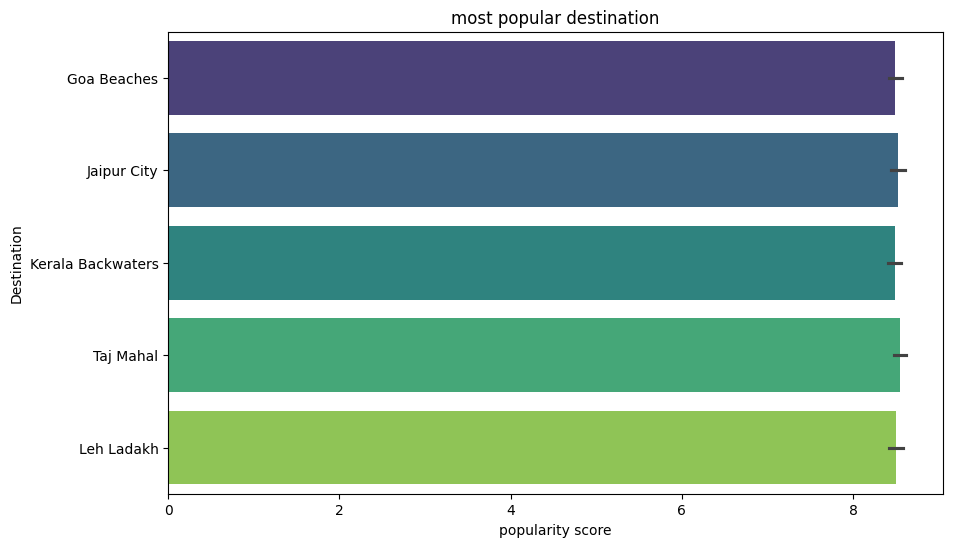

In [ ]:
# data vizualization
plt.figure(figsize=(10,6))
sns.barplot(x='Popularity',y="Name",data=destinations_df.sort_values(by='Popularity',ascending=False),palette='viridis')
plt.title('most popular destination')
plt.xlabel('popularity score')
plt.ylabel('Destination')
plt.show()


/tmp/ipython-input-366555352.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Type',data=destinations_df,order=destinations_df['Type'].value_counts().index,palette='coolwarm')


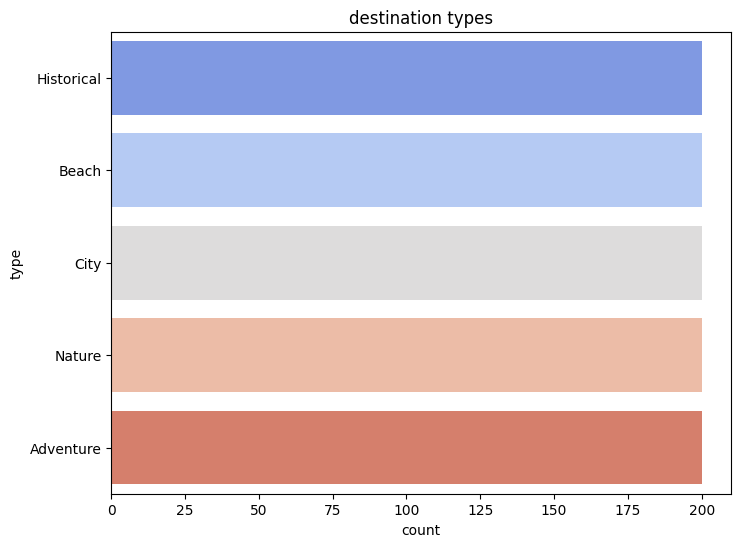

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(y='Type',data=destinations_df,order=destinations_df['Type'].value_counts().index,palette='coolwarm')
plt.title('destination types')
plt.xlabel('count')
plt.ylabel('type')
plt.show()

/tmp/ipython-input-905507940.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='BestTimeToVisit',data=destinations_df,order=destinations_df['BestTimeToVisit'].value_counts().index,palette='mako')


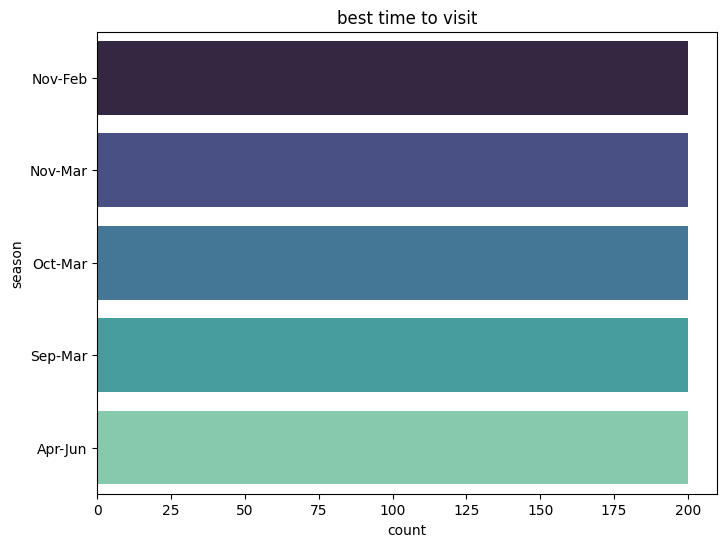

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(y='BestTimeToVisit',data=destinations_df,order=destinations_df['BestTimeToVisit'].value_counts().index,palette='mako')
plt.title('best time to visit')
plt.xlabel('count')
plt.ylabel('season')
plt.show()

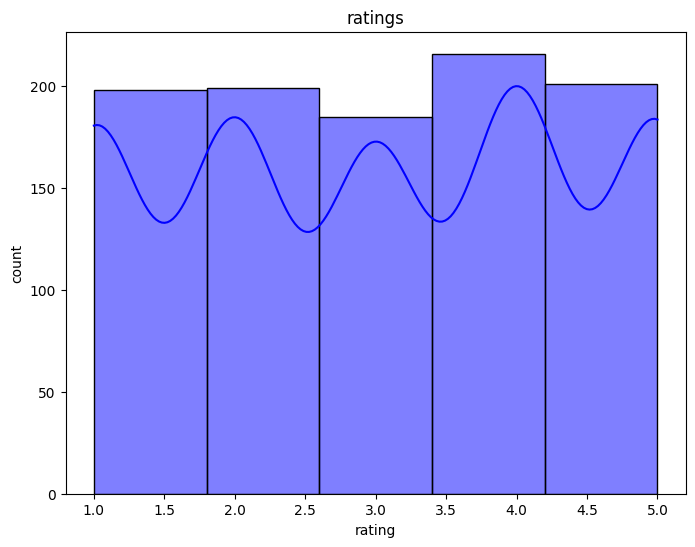

In [ ]:
# distribution of ratings
plt.figure(figsize=(8,6))
sns.histplot(reviews_df['Rating'],bins=5,kde=True,color='blue')
plt.title('ratings')
plt.xlabel('rating')
plt.ylabel('count')
plt.show()

In [ ]:
# recommendations on basis of preferences ans types

df['features']=df['Type'] + " "+df['State']+ " "+df['BestTimeToVisit']+' '+df['Preferences']
vectorizer=TfidfVectorizer(stop_words='english')
destination_features=vectorizer.fit_transform(df['features'])

#compute cosine similarity between destinations
cosine_sim=cosine_similarity(destination_features,destination_features)

In [ ]:
# recommending destinations using cosine similarity matrix

def recommend_destinations(user_id,userhistory_df,destinations_df,cosine_sim):
  # recommending top 5 destinations
  visited_destinations=userhistory_df[userhistory_df['UserID']==user_id]['DestinationID'].values
  similar_scores = np.sum(cosine_sim[visited_destinations - 1],axis=0)
  recommended_destinations_idx=np.argsort(similar_scores)[::-1]

  recommendations=[]
  for idx in recommended_destinations_idx:
    if destinations_df.iloc[idx]['DestinationID'] not in visited_destinations:
      recommendations.append(destinations_df.iloc[idx][['DestinationID','Name','State','Type','Popularity','BestTimeToVisit']].to_dict())

    if len(recommendations) >=5:
      break

  return pd.DataFrame(recommendations)
# example -- userid=1
recommended_destinations=recommend_destinations(1,userhistory_df,destinations_df,cosine_sim)
recommended_destinations

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
0,64,Kerala Backwaters,Kerala,Nature,7.995382,Sep-Mar
1,62,Goa Beaches,Goa,Beach,9.379787,Nov-Mar
2,63,Jaipur City,Rajasthan,City,9.202094,Oct-Mar
3,41,Taj Mahal,Uttar Pradesh,Historical,9.452056,Nov-Feb
4,42,Goa Beaches,Goa,Beach,8.854828,Nov-Mar


In [ ]:
userhistory_df[userhistory_df['UserID']==1]

,HistoryID,UserID,DestinationID,VisitDate,ExperienceRating
598,599,1,941,2024-02-15,5
875,876,1,467,2024-03-20,3


In [ ]:
destinations_df[destinations_df['DestinationID']==467]

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
466,467,Goa Beaches,Goa,Beach,8.025486,Nov-Mar


In [ ]:
recommended_destinations = recommend_destinations(10, userhistory_df, destinations_df, cosine_sim)

# Display recommendations
recommended_destinations

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
0,1,Taj Mahal,Uttar Pradesh,Historical,8.691906,Nov-Feb
1,17,Goa Beaches,Goa,Beach,7.524150,Nov-Mar
2,18,Jaipur City,Rajasthan,City,8.332573,Oct-Mar
3,19,Kerala Backwaters,Kerala,Nature,9.017090,Sep-Mar
4,20,Leh Ladakh,Jammu and Kashmir,Adventure,8.930902,Apr-Jun


In [ ]:
recommended_destinations = recommend_destinations(50, userhistory_df, destinations_df, cosine_sim)

recommended_destinations

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
0,639,Kerala Backwaters,Kerala,Nature,9.081926,Sep-Mar
1,62,Goa Beaches,Goa,Beach,9.379787,Nov-Mar
2,638,Jaipur City,Rajasthan,City,9.315120,Oct-Mar
3,610,Leh Ladakh,Jammu and Kashmir,Adventure,7.940661,Apr-Jun
4,63,Jaipur City,Rajasthan,City,9.202094,Oct-Mar


In [ ]:
# collaborative filtering----destinations based on behavior and preferences off other siimilar users

# create user - item matrix
user_item_matrix=userhistory_df.pivot(index='UserID',columns='DestinationID',values='ExperienceRating')

user_item_matrix.fillna(0,inplace=True) # user item interation matrix

#compute cosine similarity between users
user_similarity=cosine_similarity(user_item_matrix)

In [ ]:
# cosine similarity between users

def collaborative_recommend(user_id,user_similarity,user_item_matrix,destinations_df):
  similar_users=user_similarity[user_id - 1]

  # get top5 most similar users
  similar_users_idx=np.argsort(similar_users)[::-1][1:6]

  #get destinations liked y similar users
  similar_user_ratings=user_item_matrix.iloc[similar_users_idx].mean(axis=0)

  #recommmend top 5 destinations
  recommended_destinations_idx=similar_user_ratings.sort_values(ascending=False).head(5).index

  # filter destinations df to include detailed informations
  recommendations=destinations_df[destinations_df['DestinationID'].isin(recommended_destinations_idx)][['DestinationID','Name','State','Type','Popularity','BestTimeToVisit']]

  return recommendations

# examples
collaborative_recommendations=collaborative_recommend(1,user_similarity, user_item_matrix, destinations_df)
collaborative_recommendations


,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
5,6,Taj Mahal,Uttar Pradesh,Historical,7.648950,Nov-Feb
346,347,Goa Beaches,Goa,Beach,7.920960,Nov-Mar
519,520,Leh Ladakh,Jammu and Kashmir,Adventure,8.521876,Apr-Jun
684,685,Leh Ladakh,Jammu and Kashmir,Adventure,7.598827,Apr-Jun
784,785,Leh Ladakh,Jammu and Kashmir,Adventure,9.366933,Apr-Jun


In [ ]:
collaborative_recommendations=collaborative_recommend(11,user_similarity, user_item_matrix, destinations_df)
collaborative_recommendations

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
300,301,Taj Mahal,Uttar Pradesh,Historical,8.634309,Nov-Feb
346,347,Goa Beaches,Goa,Beach,7.920960,Nov-Mar
367,368,Jaipur City,Rajasthan,City,8.008252,Oct-Mar
435,436,Taj Mahal,Uttar Pradesh,Historical,7.728114,Nov-Feb
969,970,Leh Ladakh,Jammu and Kashmir,Adventure,9.013101,Apr-Jun


In [ ]:
collaborative_recommendations=collaborative_recommend(110,user_similarity, user_item_matrix, destinations_df)
collaborative_recommendations

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
5,6,Taj Mahal,Uttar Pradesh,Historical,7.648950,Nov-Feb
346,347,Goa Beaches,Goa,Beach,7.920960,Nov-Mar
519,520,Leh Ladakh,Jammu and Kashmir,Adventure,8.521876,Apr-Jun
684,685,Leh Ladakh,Jammu and Kashmir,Adventure,7.598827,Apr-Jun
784,785,Leh Ladakh,Jammu and Kashmir,Adventure,9.366933,Apr-Jun


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Load and preprocess the data
data = pd.read_csv('final_df.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ReviewID          993 non-null    int64  
 1   DestinationID_x   993 non-null    int64  
 2   UserID            993 non-null    int64  
 3   Rating            993 non-null    int64  
 4   ReviewText        993 non-null    object 
 5   Name_x            993 non-null    object 
 6   State             993 non-null    object 
 7   Type              993 non-null    object 
 8   Popularity        993 non-null    float64
 9   BestTimeToVisit   993 non-null    object 
 10  HistoryID         993 non-null    int64  
 11  DestinationID_y   993 non-null    int64  
 12  VisitDate         993 non-null    object 
 13  ExperienceRating  993 non-null    int64  
 14  Name_y            993 non-null    object 
 15  Email             993 non-null    object 
 16  Preferences       993 non-null    object 
 1

In [ ]:
# selecting relevant features
features=['Name_x','State','Type','BestTimeToVisit','Preferences','Gender','NumberOfAdults','NumberOfChildren']
target='Popularity' # predicting popularity

for col in features:
  if data[col].dtype=='object':
    print(col," ")

Name_x  
State  
Type  
BestTimeToVisit  
Preferences  
Gender  


In [ ]:
# selecting relevant features
features=['Name_x','State','Type','BestTimeToVisit','Preferences','Gender','NumberOfAdults','NumberOfChildren']
target='Popularity' # predicting popularity

label_encoders={}
for col in features:
  if data[col].dtype=='object':
    le=LabelEncoder()
    data[col]=le.fit_transform(data[col])
    label_encoders[col]=le

X=data[features]
y=data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# training a model
y_pred=model.predict(X_test)
print(f"mean squared error: {mean_squared_error(y_test,y_pred):.2f}")
print(f'R² Score: {r2_score(y_test, y_pred):.2f}')

mean squared error: 0.30
R² Score: 0.07


In [ ]:
import pandas as pd

In [ ]:


# Prediction system
def recommend_destinations(user_input, model, label_encoders, features, data):
    # Encode user input
    encoded_input = {}
    for feature in features:
        if feature in label_encoders:
            encoded_input[feature] = label_encoders[feature].transform([user_input[feature]])[0]
        else:
            encoded_input[feature] = user_input[feature]

    # Convert to DataFrame
    input_df = pd.DataFrame([encoded_input])

    # Predict popularity
    predicted_popularity = model.predict(input_df)[0]

    return predicted_popularity



In [ ]:
user_input = {
    'Name_x': 'Jaipur City',
    'State': 'Rajasthan',
    'Type': 'City',
    'BestTimeToVisit': 'Oct-Mar',  # This might be an unseen label
    'Preferences': 'City, Historical',
    'Gender': 'Female',
    'NumberOfAdults': 2,
    'NumberOfChildren': 1,
}

# Make a prediction
predicted_popularity = recommend_destinations(user_input, model, label_encoders, features, data)

# Print the predicted popularity and the recommended destination details
print(f"Predicted Popularity Score: {predicted_popularity:.2f}")

Predicted Popularity Score: 7.88


In [ ]:
import pickle

pickle.dump(model, open("model.pkl",'wb'))
pickle.dump(label_encoders, open("label_encoders.pkl",'wb'))

In [ ]:
print(label_encoders)

{}
